## Titanic Solution (Using Decision Tree Classifier)

- dataset is located in  https://www.kaggle.com/c/titanic/data

#### 설명

타이타닉호의 침몰은 역사상 가장 악명 높은 해상 조난 사고 중 하나이다. 

1912년 4월 12일은 타이타닉호의 첫 번째 항해였고, 가라앉지 않을 것이라고 생각했으나, 타이타닉 호는 빙산과 충돌한 후 침몰했다. 
불행하게도, 구명 보트가 모든 사람이 승선할 수 있을 만큼 충분하지 않았기 때문에, 승객과 승무원 2,224명 중 1,502명이 사망했다. 
생존하는 데에는 어느 정도의 운도 따랐겠지만,어떤 집단은 다른 집단보다 더 많이 살아남은 것으로 보인다. 
이 과제는 다음의 질문에 답하기 위한 예측 모델을 만드는 것이다. 

"어떤 유형의 사람들이 더 살아남기 쉬웠는가?"

#### 목표
- 테스트 셋의 각각에 대하여, 생존 여부를 예측하는 것이다. (생존 = 1, 사망 = 0)

#### 점수 측정
- 점수는 정확하게 예측한 비율이다(accuracy)

#### 제출 파일 형식

 - 쉼표로 구분된 csv 파일
 - 418 entries
 - Header 열을 포함. 
 - 추가 열이나 행이 없어야 함. 
 - 파일은 두 개의 열로 구성됨. 
     - PassengerID (정렬 순서는 관계 없음)
     - Survived (1 = 생존, 0 =  사망)
```
PassengerId,Survived
892,0
893,1
894,0
Etc.
```

#### 데이터 설명 

- survival: 생존 여부 (0 = 사망, 1 = 생존)
- pclass: 티켓 등급 (1 = 1등급, 2 = 2등급, 3 = 3등급)
- sex: 성별 (male, female)
- Age: 나이
- sibsp : 타이타닉호에 승선한 형제자매 또는 배우자의 수
- parch : 타이타닉호에 승선한 부모 또는 자녀의 수 
- ticket : 티켓 번호 
- fare : 여객 운임
- cabin : 객실 번호
- embarked : 출항지 (C = Cherbourg, Q=Queenstown, S=Southampton)

### Load Dataset

In [1]:
import pandas as pd

train =  pd.read_csv("titanic_data/train.csv", index_col="PassengerId")
print(train.shape)
train.head(10)

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [2]:
test = pd.read_csv("titanic_data/test.csv", index_col = "PassengerId")
print(test.shape)
test.head(10)

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


#### NaN Data

In [3]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

- Train data에서 NaN 확인
    - Age: 총 891개 중 177개의 NaN 있음. 보정 필요.
    - Cabin: 총 891개 중 687개가 NaN이므로 예측 모델의 변수로 포함하지 않음.
    - Embarked: NA가 2개이므로 무시  
    
    
- Test data에서 NaN 확인
    - Age: 418개 중 86개의 NaN
    - Cabin: 418개 중 327개의 NaN
    - Fare: 418개 중 1개 NaN

### Each column in train dataset

In [5]:
pd.pivot_table(train, index="Pclass", values = "Survived", aggfunc = ["count","mean"])

,count,mean
,Survived,Survived
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


 - Pclass는 3개의 Label로 구성
 - 승객 수는 3 > 1 > 2
 - 생존율은 1 > 2 > 3

In [6]:
pd.pivot_table(train, index="Name", values = "Survived", aggfunc = ["count","mean"]) 

,count,mean
,Survived,Survived
Name,,
"Abbing, Mr. Anthony",1,0
"Abbott, Mr. Rossmore Edward",1,0
"Abbott, Mrs. Stanton (Rosa Hunt)",1,1
"Abelson, Mr. Samuel",1,0
"Abelson, Mrs. Samuel (Hannah Wizosky)",1,1
"Adahl, Mr. Mauritz Nils Martin",1,0
"Adams, Mr. John",1,0
"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",1,0


- 중복 "Name" 없음
- 중복 "Last Name" 있음
- 중복 호칭 있음
- Text split 해서 데이터 수정 필요

In [7]:
pd.pivot_table(train, index="Sex", values = "Survived", aggfunc = ["count","mean"]) 

,count,mean
,Survived,Survived
Sex,,
female,314,0.742038
male,577,0.188908


- Sex는 2개의 Label로 구성 
- 승객 수는 남성 > 여성
- 생존율은 여성 > 남성

In [8]:
pd.pivot_table(train, index="Age", values = "Survived", aggfunc = ["count","mean"]) 

,count,mean
,Survived,Survived
Age,,
0.42,1,1.000000
0.67,1,1.000000
0.75,2,1.000000
0.83,2,1.000000
0.92,1,1.000000
1.00,7,0.714286
2.00,10,0.300000
3.00,6,0.833333


- 연속형 변수로 처리할 수도 있겠지만 정규 분포를 따르는지 시각화 과정에서 한 번 더 확인 필요.
- NaN값을 어떻게 보정할 것인지 생각 필요. 

In [9]:
pd.pivot_table(train, index="SibSp", values = "Survived", aggfunc = ["count","mean"]) 

,count,mean
,Survived,Survived
SibSp,,
0,608,0.345395
1,209,0.535885
2,28,0.464286
3,16,0.250000
4,18,0.166667
5,5,0.000000
8,7,0.000000


- 승객 수는 0 > 1 > 2 > 3 > 4 > 5 > 8
- 생존율은 1 > 2 > 0 > 3 > 4 > 5 > 8
- SibSp의 경우 생존율에 대해 선형적인 관계가 관찰되지는 않음. (시각화에서 다시 확인)

In [10]:
pd.pivot_table(train, index="Parch", values = "Survived", aggfunc = ["count","mean"]) 

,count,mean
,Survived,Survived
Parch,,
0,678,0.343658
1,118,0.550847
2,80,0.500000
3,5,0.600000
4,4,0.000000
5,5,0.200000
6,1,0.000000


- 승객 수는 0 > 1 > 2 > 3 > 4 > 5 > 6
- 생존율은 1 > 2 > 3 > 0 > 5 > 4 = 6
- Parch의 경우도 생존율에 대해 선형적인 관계가 관찰되지 않음. (시각화에서 다시 확인)

In [11]:
pd.pivot_table(train, index="Ticket", values = "Survived", aggfunc = ["count","mean"]).head()

,count,mean
,Survived,Survived
Ticket,,
110152,3,1.000000
110413,3,0.666667
110465,2,0.000000
110564,1,1.000000
110813,1,1.000000


 - 티켓 번호가 같음  =  동승인이 있음(?), 즉 가족 외 친밀한 관계를 반영할 가능성. 
 - 약 200여건의 케이스에서 중복된 티켓 카운트가 있음. 
 - 단체 관광 티켓 같은 것이 없었다는 전제 하에.  

In [12]:
pd.pivot_table(train, index="Fare", values = "Survived", aggfunc = ["count","mean"]).head(10)

,count,mean
,Survived,Survived
Fare,,
0.0000,15,0.066667
4.0125,1,0.000000
5.0000,1,0.000000
6.2375,1,0.000000
6.4375,1,0.000000
6.4500,1,0.000000
6.4958,2,0.000000
6.7500,2,0.000000


 -  시각화에서 확인 

In [13]:
pd.pivot_table(train, index="Embarked", values = "Survived", aggfunc = ["count","mean"]) 

,count,mean
,Survived,Survived
Embarked,,
C,168,0.553571
Q,77,0.389610
S,644,0.336957


 - 승객 수는 S > C > Q
 - 생존율은 C > Q > S 

## Visualize 

In [14]:
%matplotlib inline
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt

> ### Pclass

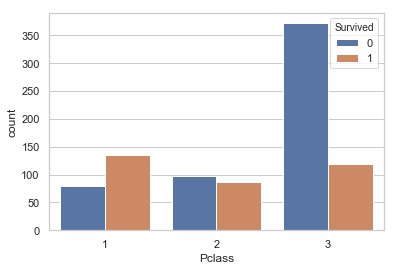

In [15]:
sns.countplot(data = train, x = "Pclass", hue = "Survived")

- 3등급 승객의 생존 확률이 매우 낮음 
- 변별력 있는 변수로 생각됨

> ### Name

In [16]:
# Train dataset text split

train['last_name'] =  train.Name.str.split(',').str[0]
train['title'] = train.Name.str.split(',').str[1].str.split('.').str[0]
print(train.shape)
train.head()

(891, 13)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,title
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr


In [17]:
pd.pivot_table(train, index="last_name", values = "Survived", aggfunc = ["count","mean"]) 

,count,mean
,Survived,Survived
last_name,,
Abbing,1,0.000000
Abbott,2,0.500000
Abelson,2,0.500000
Adahl,1,0.000000
Adams,1,0.000000
Ahlin,1,0.000000
Aks,1,1.000000
Albimona,1,1.000000


 - Last Name은 그대로 쓰기보다는 성이 같은 사람이 있는지 없는지 확인하는 용도로 쓸 수 있을 듯
 - 다만, 이렇게 하면 SibSp +  Parch 와 거의 유사한 결과가 나올 것. 우선은 제외 

In [18]:
pd.pivot_table(train, index="title", values = "Survived", aggfunc = ["count","mean"]) 

,count,mean
,Survived,Survived
title,,
Capt,1,0.000000
Col,2,0.500000
Don,1,0.000000
Dr,7,0.428571
Jonkheer,1,0.000000
Lady,1,1.000000
Major,2,0.500000
Master,40,0.575000


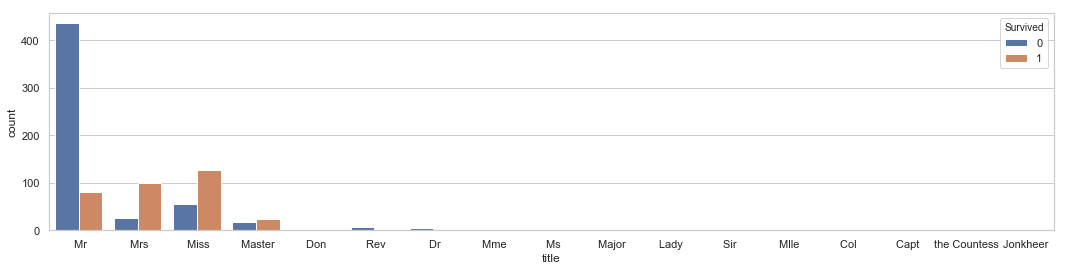

In [19]:
plt.figure(figsize = (18, 4))
sns.countplot(data = train, x = "title", hue = "Survived")

 - 같은 남자라도 Master의 생존율은 상대적으로 높은 편
 - Mr, Mrs, Miss, Master는 표본 수가 어느 정도 있지만, 그 외의 경우는 많지 않음.
 - title 컬럼은 Mr, Mrs, Miss, Master, etc로 구성하여 조정 필요

> ### Sex

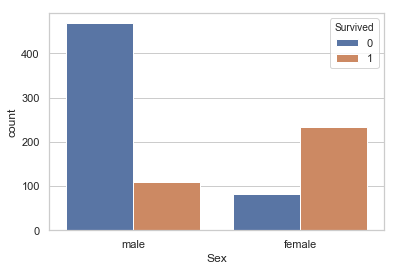

In [20]:
sns.countplot(data = train, x = "Sex", hue = "Survived")

> ### Age

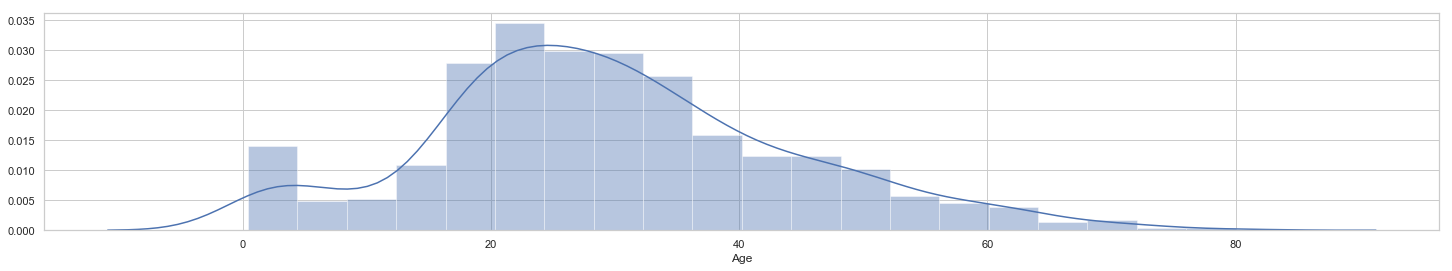

In [21]:
plt.figure(figsize = (25, 4))
Age_temp = train.loc[train["Age"].notnull()]
sns.distplot(Age_temp["Age"])

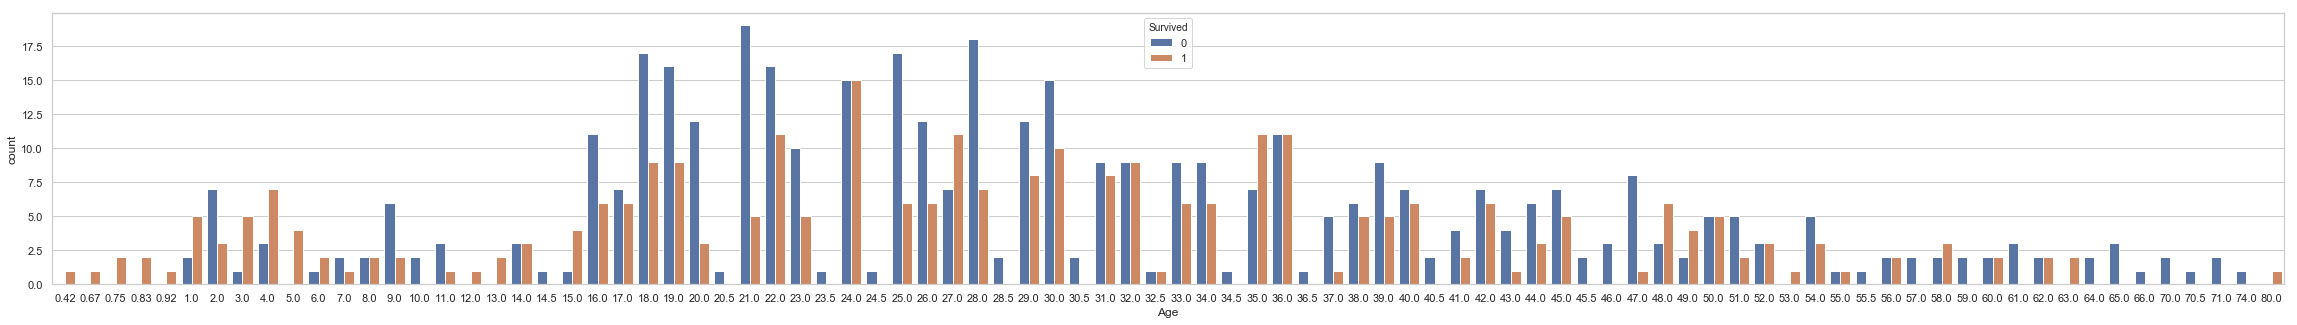

In [22]:
plt.figure(figsize = (40, 5))
sns.countplot(data = Age_temp, x= "Age", hue = "Survived")

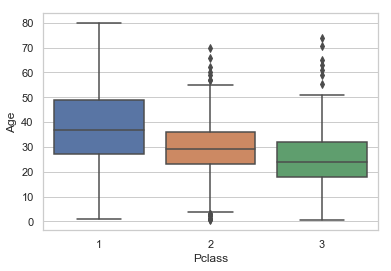

In [23]:
ax = sns.boxplot(x="Pclass", y="Age", data=train)

- 어린 아이일 수록 생존율이 높아 보임 (10세 미만?)
- 나이별 표본 수가 많지 않기 때문에 그룹을 만들어서 적용 필요. 
- Age < 15  Child
- 15 < Age <= 40, Yong
- Age > 40, Old
- 평균값 채우기 필요? 또는 Child or Not Child?

> ### SibSp & Parch

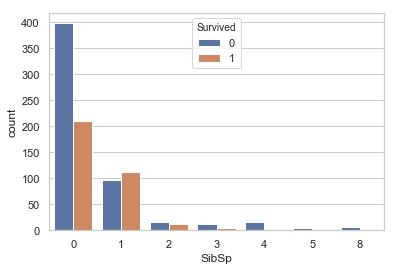

In [24]:
sns.countplot(data = train, x= "SibSp", hue = "Survived")

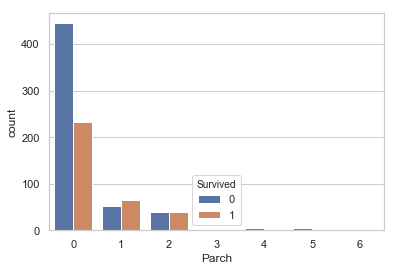

In [25]:
sns.countplot(data = train, x= "Parch", hue = "Survived")

- 두 경우 모두 비슷한 경향성. 합산하여 다시 확인

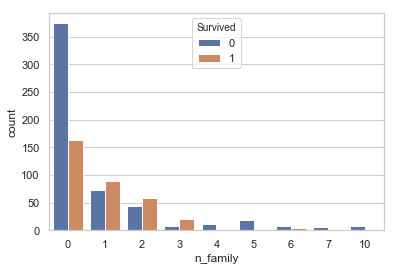

In [26]:
train['n_family'] =  train["Parch"]+train["SibSp"]
sns.countplot(data = train, x= "n_family", hue = "Survived")

-  전체 모수의 수가 작으므로 변수와 라벨의 수를 줄이는 것이 필요할 것으로 보임. 
-  Family로 적용했을 때에도 경향성이 유지되고, 본인 외 가족이 2,3명인 경우의 경향성도 확인할 수 있음. 
-  Parch = 1 & SibSp = 1 이라고 하면 부모와 자녀가 함께 승선한 경우로 추측할 수 있음. 
-  싱글, 소규모 가족, 대가족으로 구분 가능.

> ### Ticket

        Survived
Ticket          
110152         3
110413         3
110465         2
110564         1
110813         1


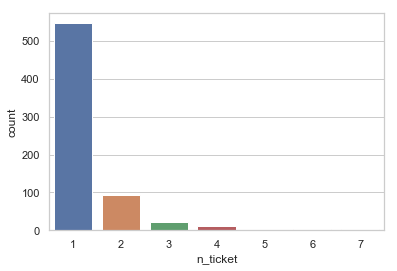

In [27]:
ticket_temp = pd.pivot_table(train, index="Ticket", values = "Survived", aggfunc = "count") 
print(ticket_temp.head())
ticket_temp.columns = ["n_ticket"]
sns.countplot(data = ticket_temp, x= "n_ticket")

In [28]:
ticket_temp= ticket_temp.reset_index()
ticket_temp.head()

,Ticket,n_ticket
0,110152,3
1,110413,3
2,110465,2
3,110564,1
4,110813,1


In [29]:
train_temp = pd.merge(ticket_temp, train)
print(train.shape)
train_temp.head()

(891, 14)


,Ticket,n_ticket,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,last_name,title,n_family
0,110152,3,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,86.50,B77,S,Cherry,Miss,0
1,110152,3,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,86.50,B79,S,Maioni,Miss,0
2,110152,3,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,86.50,B77,S,Rothes,the Countess,0
3,110413,3,0,1,"Taussig, Mr. Emil",male,52.0,1,1,79.65,E67,S,Taussig,Mr,2
4,110413,3,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,79.65,E67,S,Taussig,Mrs,2


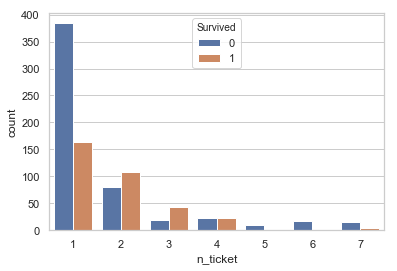

In [30]:
sns.countplot(data = train_temp, x= "n_ticket", hue = "Survived")

-  동승인 유무로 적용할 수 있는 변수로 보임, 특히 n_ticket이 2 또는 3일 때 생존자가 사망자보다 많음. 
    -   n_ticket > 1, 'fellow= TRUE'

> ### Fare

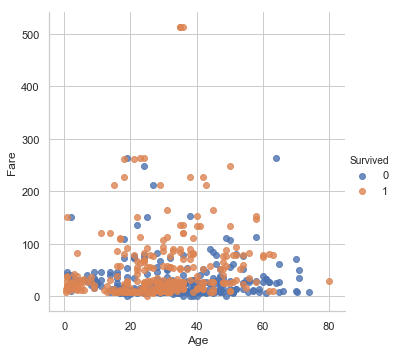

In [31]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [32]:
low_fare =  train[train["Fare"]<500]
train.shape, low_fare.shape

((891, 14), (888, 14))

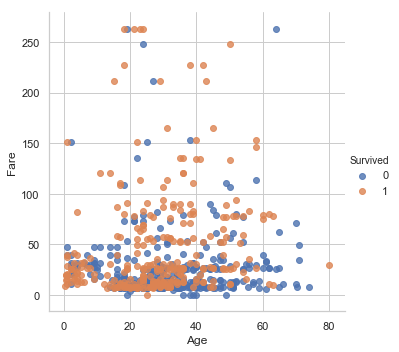

In [33]:
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [34]:
low_low_fare =  train[train["Fare"]<100]
train.shape, low_fare.shape, low_low_fare.shape

((891, 14), (888, 14), (838, 14))

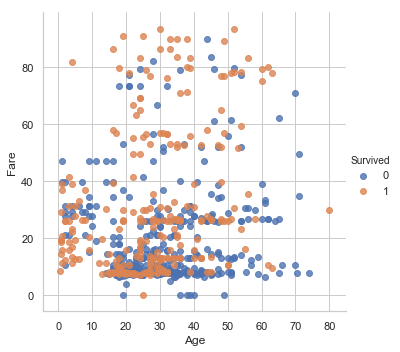

In [35]:
sns.lmplot(data=low_low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

 - Fare가 높은 그룹에서 생존율이 높음.
 - 어린아이는 Fare가 낮을 때 생존율이 높음

> ### Embarked

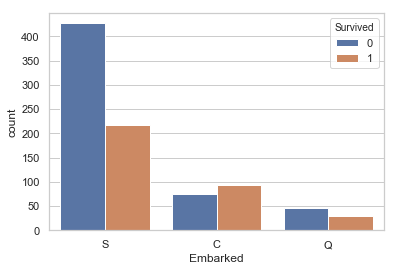

In [36]:
sns.countplot(data = train, x = "Embarked", hue = "Survived")

# Preprocessing

#### 절차 
1. train.csv 와 test.csv를 다시 불러온다. (처음부터 시작)
2. 변수별 조정
    - Pclass : 조정 없음 
    - Name : title 추출, Mr, Mrs, Miss, Master 범주 만들기 (One-hot vector)
    - Sex : male = 0, female= 1로 인코딩 
    - Age : Child 범주 만들기 (One-hot-vector), NaN 값 무시 (범주로 만들었기 때문)
            - Age < 15 Child
    - SibSp, Parch = 더해서 가족 수로 변환(n_family), single, small, big 범주 만들기(one-hot vector)
            - n_family = 0, single
            - n_family = (1,2,3), small
            - n_family>3, big
    - Ticket
            - 피벗 테이블을 이용하여 같은 티켓을 가진 승객 수 확인
            - 해당 테이블을 원 테이블에 Join
            - fellow = 동승인 있음(n_ticket>1)
    - Fare
            - test data의 NaN은 0으로 수정 (1건)
    - Embarked
            - 범주로 변환. "Embarked_C", "Embarked_S", "Embarked_Q"
            - train data의 NaN은 무시 (범주형으로 바꾸었으므로)

In [37]:
train = pd.read_csv("titanic_data/train.csv", index_col = "PassengerId")
print(train.shape)
train.head(3)

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [38]:
test = pd.read_csv("titanic_data/test.csv", index_col = "PassengerId")
print(test.shape)
test.head(3)

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


> ### Title

In [39]:
## Title encoding

train["title"] = train.Name.str.split(', ').str[1].str.split('.').str[0]
print(train.shape)
train.head(3)

(891, 12)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [40]:
test["title"] = test.Name.str.split(', ').str[1].str.split('.').str[0]
print(test.shape)
test.head(3)

(418, 11)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr


In [41]:
train["Mr"] =  train["title"] ==  "Mr"
train["Mrs"] =  train["title"] ==  "Mrs"
train["Miss"] =  train["title"] ==  "Miss"
train["Master"] =  train["title"] == "Master"
print(train.shape)
train.head(3)
train[["Name", "Mr","Mrs","Miss","Master"]].head(10)

(891, 16)


,Name,Mr,Mrs,Miss,Master
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",True,False,False,False
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,True,False,False
3,"Heikkinen, Miss. Laina",False,False,True,False
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,True,False,False
5,"Allen, Mr. William Henry",True,False,False,False
6,"Moran, Mr. James",True,False,False,False
7,"McCarthy, Mr. Timothy J",True,False,False,False
8,"Palsson, Master. Gosta Leonard",False,False,False,True
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",False,True,False,False


In [42]:
test["Mr"] =  test["title"] ==  "Mr"
test["Mrs"] =  test["title"] ==  "Mrs"
test["Miss"] =  test["title"] ==  "Miss"
test["Master"] =  test["title"] == "Master"
print(test.shape)
test[["Name", "Mr","Mrs","Miss","Master"]].head(10)

(418, 15)


,Name,Mr,Mrs,Miss,Master
PassengerId,,,,,
892,"Kelly, Mr. James",True,False,False,False
893,"Wilkes, Mrs. James (Ellen Needs)",False,True,False,False
894,"Myles, Mr. Thomas Francis",True,False,False,False
895,"Wirz, Mr. Albert",True,False,False,False
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False,True,False,False
897,"Svensson, Mr. Johan Cervin",True,False,False,False
898,"Connolly, Miss. Kate",False,False,True,False
899,"Caldwell, Mr. Albert Francis",True,False,False,False
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",False,True,False,False


> ### Sex

In [43]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1
print(train.shape)
train.head(3)

(891, 17)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Mr,Mrs,Miss,Master,Sex_encode
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,True,False,False,False,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,False,True,False,False,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False,False,True,False,1.0


In [44]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1
print(test.shape)
test.head(3)

(418, 16)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Mr,Mrs,Miss,Master,Sex_encode
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,True,False,False,False,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,False,True,False,False,1.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,True,False,False,False,0.0


> ### Age

In [45]:
train["Child"] = train["Age"] <= 15

print(train.shape)
train.head(3)

(891, 18)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Mr,Mrs,Miss,Master,Sex_encode,Child
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,True,False,False,False,0.0,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,False,True,False,False,1.0,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False,False,True,False,1.0,False


In [46]:
test["Child"] = test["Age"] <= 15


print(test.shape)
test.head(3)

(418, 17)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Mr,Mrs,Miss,Master,Sex_encode,Child
PassengerId,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,True,False,False,False,0.0,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,False,True,False,False,1.0,False
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,True,False,False,False,0.0,False


> ### Family

In [47]:
train["n_family"] =  train["SibSp"] + train["Parch"]
train["f_single"] = train["n_family"] == 0
train["f_small"] = (train["n_family"] > 0) & (train["n_family"] < 4)
train["f_large"] = train["n_family"] >= 4

print(train.shape)
train.head(3)

(891, 22)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Mr,Mrs,Miss,Master,Sex_encode,Child,n_family,f_single,f_small,f_large
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,True,False,False,False,0.0,False,1,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,False,True,False,False,1.0,False,1,False,True,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,False,False,True,False,1.0,False,0,True,False,False


In [48]:
test["n_family"] =  test["SibSp"] + test["Parch"]
test["f_single"] = test["n_family"] == 0
test["f_small"] = (test["n_family"] > 0) & (test["n_family"] < 4)
test["f_large"] = test["n_family"] >= 4

print(test.shape)
test[["n_family", "f_single", "f_small", "f_large"]].head(10)

(418, 21)


,n_family,f_single,f_small,f_large
PassengerId,,,,
892,0,True,False,False
893,1,False,True,False
894,0,True,False,False
895,0,True,False,False
896,2,False,True,False
897,0,True,False,False
898,0,True,False,False
899,2,False,True,False
900,0,True,False,False


> ### Ticket

In [49]:
ticket_temp = pd.pivot_table(train, index="Ticket", values = "Sex", aggfunc = "count") 
ticket_temp.columns = ["n_ticket"]
ticket_temp= ticket_temp.reset_index()
print(ticket_temp.head())
train =  train.reset_index()
train = pd.merge(train, ticket_temp)
print(train.shape)
train.head(6)

   Ticket  n_ticket
0  110152         3
1  110413         3
2  110465         2
3  110564         1
4  110813         1
(891, 24)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Mrs,Miss,Master,Sex_encode,Child,n_family,f_single,f_small,f_large,n_ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,False,False,0.0,False,1,False,True,False,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,True,False,False,1.0,False,1,False,True,False,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,False,True,False,1.0,False,0,True,False,False,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,True,False,False,1.0,False,1,False,True,False,2
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,...,False,False,False,0.0,False,1,False,True,False,2
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,False,False,False,0.0,False,0,True,False,False,1


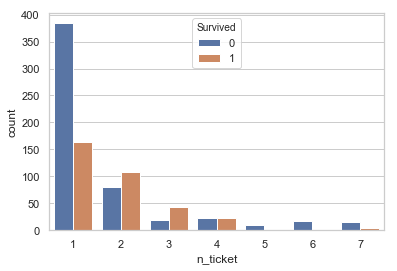

In [50]:
sns.countplot(data=train, x="n_ticket",hue="Survived")

In [51]:
ticket_temp = pd.pivot_table(test, index="Ticket", values = "Sex", aggfunc = "count") 
ticket_temp.columns = ["n_ticket"]
ticket_temp= ticket_temp.reset_index()
print(ticket_temp.head())
test=  test.reset_index()
test = pd.merge(test, ticket_temp)
print(test.shape)
test.head()

   Ticket  n_ticket
0  110469         1
1  110489         1
2  110813         1
3  111163         1
4  112051         1
(418, 23)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Mrs,Miss,Master,Sex_encode,Child,n_family,f_single,f_small,f_large,n_ticket
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,False,False,False,0.0,False,0,True,False,False,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,True,False,False,1.0,False,1,False,True,False,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,False,False,False,0.0,False,0,True,False,False,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,False,False,False,0.0,False,0,True,False,False,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,True,False,False,1.0,False,2,False,True,False,1


In [52]:
train["fellow"] = train["n_ticket"] > 1
train = train.sort_values(by=['PassengerId'])
print(train.shape)
train.head()

(891, 25)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Miss,Master,Sex_encode,Child,n_family,f_single,f_small,f_large,n_ticket,fellow
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,False,0.0,False,1,False,True,False,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,False,1.0,False,1,False,True,False,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,True,False,1.0,False,0,True,False,False,1,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,False,False,1.0,False,1,False,True,False,2,True
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,False,False,0.0,False,0,True,False,False,1,False


In [53]:
test["fellow"] =  test["n_ticket"] > 1
test = test.sort_values(by=['PassengerId'])
print(test.shape)
test.head()

(418, 24)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Miss,Master,Sex_encode,Child,n_family,f_single,f_small,f_large,n_ticket,fellow
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,False,False,0.0,False,0,True,False,False,1,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,False,False,1.0,False,1,False,True,False,1,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,False,False,0.0,False,0,True,False,False,1,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,False,False,0.0,False,0,True,False,False,1,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,False,False,1.0,False,2,False,True,False,1,False


> ### Fare

In [54]:
train[train["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Miss,Master,Sex_encode,Child,n_family,f_single,f_small,f_large,n_ticket,fellow


In [55]:
train["Fare_fillin"] = train["Fare"]
train.loc[train["Fare"].isnull(),"Fare_fillin"] = 0
train.loc[train["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin


In [56]:
train[["Fare", "Fare_fillin"]].head(10)

,Fare,Fare_fillin
0,7.2500,7.2500
1,71.2833,71.2833
2,7.9250,7.9250
3,53.1000,53.1000
5,8.0500,8.0500
6,8.4583,8.4583
7,51.8625,51.8625
8,21.0750,21.0750
12,11.1333,11.1333
15,30.0708,30.0708


In [57]:
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Miss,Master,Sex_encode,Child,n_family,f_single,f_small,f_large,n_ticket,fellow
172,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,...,False,False,0.0,False,0,True,False,False,1,False


In [58]:
test["Fare_fillin"] = test["Fare"]
test.loc[test["Fare"].isnull(),"Fare_fillin"] = 0
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
172,NaN,0.0


In [59]:
test[["PassengerId","Fare", "Fare_fillin"]].head()

,PassengerId,Fare,Fare_fillin
0,892,7.8292,7.8292
1,893,7.0000,7.0000
2,894,9.6875,9.6875
3,895,8.6625,8.6625
4,896,12.2875,12.2875


> ### Embarked

In [60]:
train["Embarked_C"] =  train["Embarked"] == "C"
train["Embarked_Q"] =  train["Embarked"] == "Q"
train["Embarked_S"] =  train["Embarked"] == "S"

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(891, 29)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,False,False,True
1,C,True,False,False
2,S,False,False,True
3,S,False,False,True
5,S,False,False,True


In [61]:
test["Embarked_C"] =  test["Embarked"] == "C"
test["Embarked_Q"] =  test["Embarked"] == "Q"
test["Embarked_S"] =  test["Embarked"] == "S"

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(418, 28)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,Q,False,True,False
1,S,False,False,True
2,Q,False,True,False
3,S,False,False,True
4,S,False,False,True


# Feature Selection

In [62]:
list(train.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'title',
 'Mr',
 'Mrs',
 'Miss',
 'Master',
 'Sex_encode',
 'Child',
 'n_family',
 'f_single',
 'f_small',
 'f_large',
 'n_ticket',
 'fellow',
 'Fare_fillin',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

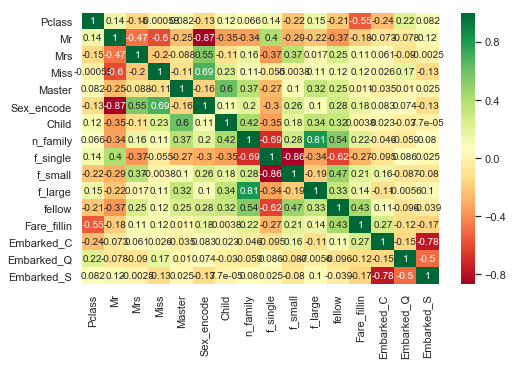

In [63]:
All_features = ['Pclass', 'Mr','Mrs','Miss','Master', 
                'Sex_encode','Child','n_family','f_single',
                'f_small','f_large','fellow','Fare_fillin',
                'Embarked_C','Embarked_Q','Embarked_S']
X = train[All_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

C:\Users\ssohe.DESKTOP-Q8QGC5L\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 5
Selected features: ['Pclass', 'Mr', 'Master', 'Sex_encode', 'f_large']


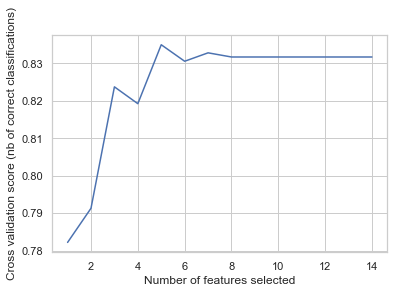

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

# 수치형 변수를 쓰지 않기로 결정. 
features = ['Pclass', 'Mr','Miss','Mrs','Master', 
            'Sex_encode', 'Child', 'f_single', 'f_small','f_large',
            'fellow', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
label  = ['Survived']

X = train[features]
y = train[label]

#여러 개의 max_depth를 시험해 봄 
model = DecisionTreeClassifier(max_depth = 5, random_state=0) 

selector = RFECV(model, step=1, cv= 10, scoring = 'accuracy')
selector = selector.fit(X, y)
print("Optimal number of features : %d" % selector.n_features_)
print('Selected features: %s' % list(X.columns[selector.support_]))
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [65]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(model, X, y, cv = 10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(model.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
DecisionTreeClassifier average accuracy: 0.832 (+/-0.038)
DecisionTreeClassifier average log_loss: 0.656 (+/-0.415)
DecisionTreeClassifier average auc: 0.869 (+/-0.044)


# Train

In [66]:
feature_names = list(X.columns[selector.support_])
feature_names

['Pclass', 'Mr', 'Master', 'Sex_encode', 'f_large']

In [67]:
label_name = "Survived"
label_name

'Survived'

In [68]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 5)


,Pclass,Mr,Master,Sex_encode,f_large
0,3,True,False,0.0,False
1,1,False,False,1.0,False
2,3,False,False,1.0,False
3,1,False,False,1.0,False
5,3,True,False,0.0,False


In [69]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 5)


,Pclass,Mr,Master,Sex_encode,f_large
0,3,True,False,0.0,False
1,3,False,False,1.0,False
2,2,True,False,0.0,False
3,3,True,False,0.0,False
4,3,False,False,1.0,False


In [70]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(891,)


0    0
1    1
2    1
3    1
5    0
Name: Survived, dtype: int64

# Use Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 5,random_state=0)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [72]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

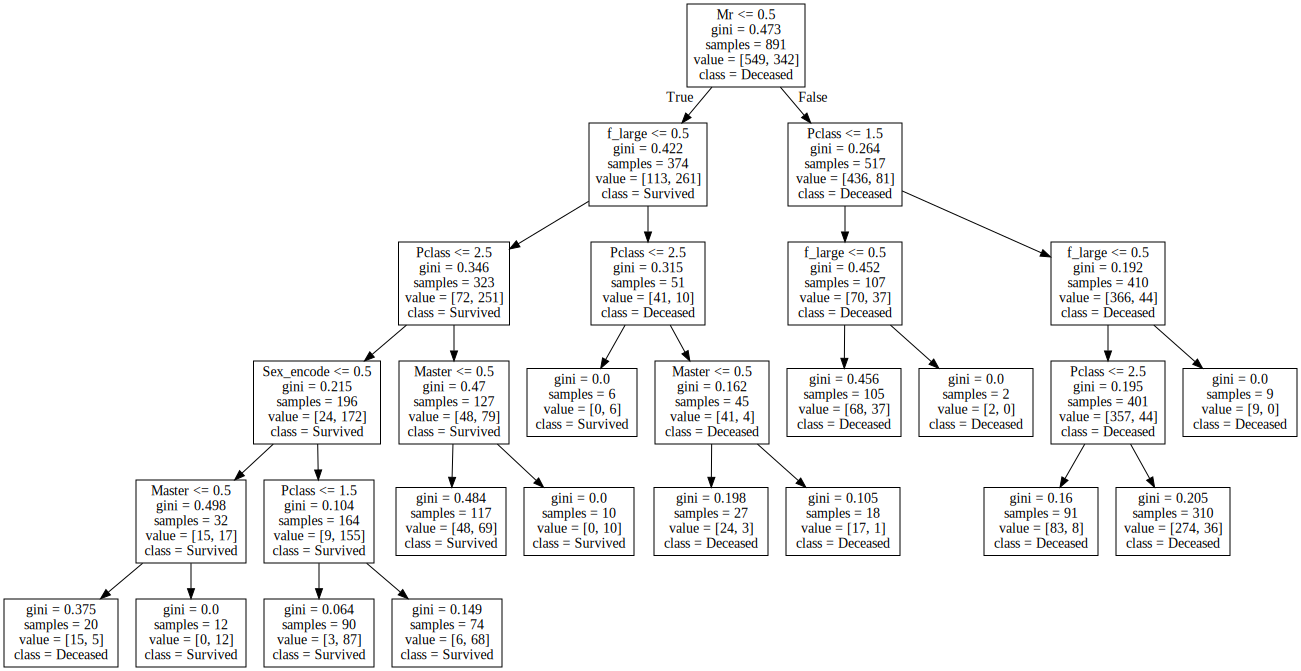

In [77]:
import graphviz
from sklearn.tree import export_graphviz
dot_tree = export_graphviz(model,
                          feature_names = feature_names,
                          class_names = ["Deceased","Survived"],
                          out_file = None)

dot = graphviz.Source(dot_tree)
dot.render(filename='tree.png') 
graphviz.Source(dot_tree)

## Predict

In [74]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions[0:10]

(418,)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

## Submit

In [75]:
submission =  pd.read_csv("titanic_data/gender_submission.csv", index_col = "PassengerId")                                                                   
print(submission.shape)

(418, 1)


In [76]:
submission["Survived"] = predictions
submission.to_csv("titanic_decision_tree_sophie.csv")

### (Score :  0.78947)